### Convolutional Neural Network for CIFAR-10(STUDENT)
Billy Hau - 7/28/2022

In this exercise, we will explore the CIFAR-10 dataset. Similar to MNIST, you are trying to classify data in 10 classes. However, CIFAR-10 are colored image with RGB channels. Therefore it will be harder to train the model. 

We will explore the differences between ANN, CNN and Transfer Learning. 

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Class Labels
cifar10_label = {   0:'airplane',
                    2:'bird',
                    1:'automobile',
                    3:'cat',
                    4:'deer',
                    5:'dog',
                    6:'frog',
                    7:'horse',
                    8:'ship',
                    9:'truck'}

 2 - bird
 0 - airplane
 7 - horse
 5 - dog
 3 - cat
 4 - deer
 7 - horse
 0 - airplane
 0 - airplane
 4 - deer


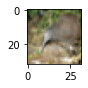

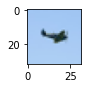

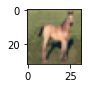

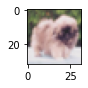

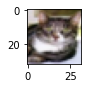

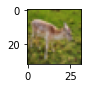

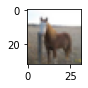

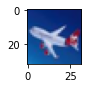

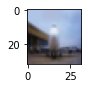

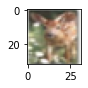

In [4]:
# Let's Take a Look at some the Images
index_list = np.random.randint(low=0, high=x_test.shape[0], size=10)

for id in index_list:
    print(f' {y_train[id][0]} - {cifar10_label[y_train[id][0]]}')
    plt.figure(figsize=(1,1))
    plt.imshow(x_train[id])

In [5]:
# Let's Take a Look at the x_train shape... seems like these are 32x32 images RGB channels
x_train.shape

(50000, 32, 32, 3)

In [6]:
# Let's Take a look at y_train, the output... seems like we need to OneHotEncode these
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
# OneHotEncode y_train and y_test
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train2 = encoder.fit_transform(y_train).toarray()
y_test2 = encoder.transform(y_test).toarray()

### Artificial Neural Network

Alright, let's try the same old approach. Flatten the image and then feed them into a ANN!

*Hints* - Add Complexity if underfit / Add Dropout and BatchNormalization if overfit + reduce complexity

In [8]:
# Define Artificial Neural Network

input = keras.layers.Input(x_train.shape[1:])
x = keras.layers.Flatten() (input)
x = keras.layers.Dropout(0.2) (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.Dense(64, activation='relu') (x)
x = keras.layers.Dropout(0.2) (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.Dense(64, activation='relu') (x)
x = keras.layers.Dropout(0.2) (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.Dense(64, activation='relu') (x)
x = keras.layers.Dropout(0.2) (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.Dense(64, activation='relu') (x)
x = keras.layers.Dropout(0.2) (x)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.Dense(64, activation='relu') (x)
x = keras.layers.Dropout(0.2) (x)
x = keras.layers.BatchNormalization() (x)
output = keras.layers.Dense(10, activation='softmax') (x)

model = keras.Model(input, output)


In [9]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [13]:
# Train Model (reduce batch size if you don't have gpu!)
history = model.fit(x_train, y_train2, validation_data=(x_test, y_test2), epochs=100, batch_size=512)

Epoch 1/100
98/98 [==============================] - 8s 61ms/step - loss: 2.3476 - categorical_accuracy: 0.1865 - val_loss: 2.1940 - val_categorical_accuracy: 0.2537
Epoch 2/100
98/98 [==============================] - 6s 57ms/step - loss: 2.0157 - categorical_accuracy: 0.2624 - val_loss: 1.8058 - val_categorical_accuracy: 0.3605
Epoch 3/100
98/98 [==============================] - 6s 56ms/step - loss: 1.9113 - categorical_accuracy: 0.3019 - val_loss: 1.7185 - val_categorical_accuracy: 0.3831
Epoch 4/100
98/98 [==============================] - 6s 56ms/step - loss: 1.8535 - categorical_accuracy: 0.3284 - val_loss: 1.6688 - val_categorical_accuracy: 0.3984
Epoch 5/100
98/98 [==============================] - 5s 56ms/step - loss: 1.8085 - categorical_accuracy: 0.3459 - val_loss: 1.6184 - val_categorical_accuracy: 0.4221
Epoch 6/100
98/98 [==============================] - 6s 56ms/step - loss: 1.7681 - categorical_accuracy: 0.3592 - val_loss: 1.5929 - val_categorical_accuracy: 0.4290
Epoc

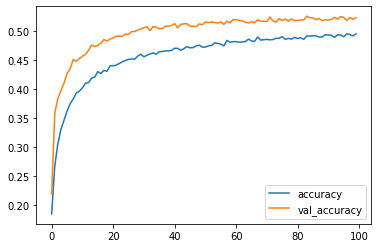

In [11]:
# Plot the Metric Curve and Evaluate... seems not too good, but at least 50% accuracy...
plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()

### Convolutional Neural Network

Let's see if we can apply what we have learned in the lecture to improve the performance. Let's try a Convolutional Neural Network! Please note that the input to a CNN is (height, width, channel). And that the arguments into the Convolution2D layers are # of filters and kernel size. Usually we use MaxPool2D to further compress the data before using a Dense layer to do classification. Use BatchNormalization and Dropout to prevent overfit!

In [12]:
# Convolutional Neural Network

input2 = keras.layers.Input(x_train.shape[1:])
x2 = keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu') (input2)
x2 = keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu') (x2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.MaxPool2D()(x2)
x2 = keras.layers.Flatten() (x2)
x2 = keras.layers.Dropout(0.5) (x2) # Percentage of Nodes to Randomly Drop
x2 = keras.layers.BatchNormalization() (x2)
x2 = keras.layers.Dense(128, activation='relu') (x2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.Dropout(0.5) (x2)
output2 = keras.layers.Dense(10, activation='softmax') (x2)

model2 = keras.Model(input2, output2)

In [13]:
# Compile Model
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [14]:
# Train Model (reduce batch size if you don't have gpu!)
history2 = model2.fit(x_train, y_train2, validation_data=(x_test, y_test2), epochs=10, batch_size=512)

Epoch 1/10
98/98 [==============================] - 13s 32ms/step - loss: 1.8753 - categorical_accuracy: 0.3920 - val_loss: 1.5923 - val_categorical_accuracy: 0.5083
Epoch 2/10
98/98 [==============================] - 3s 27ms/step - loss: 1.3436 - categorical_accuracy: 0.5267 - val_loss: 1.5346 - val_categorical_accuracy: 0.4838
Epoch 3/10
98/98 [==============================] - 2s 25ms/step - loss: 1.1803 - categorical_accuracy: 0.5816 - val_loss: 1.1155 - val_categorical_accuracy: 0.5992
Epoch 4/10
98/98 [==============================] - 3s 26ms/step - loss: 1.0837 - categorical_accuracy: 0.6179 - val_loss: 1.0539 - val_categorical_accuracy: 0.6280
Epoch 5/10
98/98 [==============================] - 3s 26ms/step - loss: 1.0199 - categorical_accuracy: 0.6397 - val_loss: 1.0520 - val_categorical_accuracy: 0.6290
Epoch 6/10
98/98 [==============================] - 2s 25ms/step - loss: 0.9761 - categorical_accuracy: 0.6532 - val_loss: 1.0054 - val_categorical_accuracy: 0.6438
Epoch 7/1

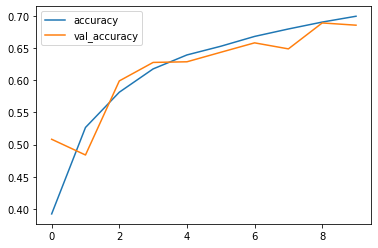

In [15]:
# Plot the Metric Curve and Evaluate... much better!
plt.plot(history2.history['categorical_accuracy'], label='accuracy')
plt.plot(history2.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()

### Transfer Learning and Data Augmentation

Alright, CNN did pretty well in comparison with ANN, give us around 20% accuracy boost! Now can we do better? Notice how we have some overfitting problem during experimentation? That mean we need to give it more variety of training samples. We can do that via Data Augmentation, specially the ImageDataGenerator class from TensorFlow. It will alter the images, like flip, rotate, scale... which will help the model learn better. 

In addition, why reinvent the wheel? Many people already previously trained models against a huge image dataset called Imagenet. Imagenet contain 1000 classes!!! Why don't we take that "brain" and apply our problem with it? 

<img src='https://miro.medium.com/max/1400/1*LUFUl_8fqS97nUzpcFjgWw.png' height='300px'>

Basically, we take someone else's network, cut it where it finalize into the last Classification (Dense) layers. And add ours to it. We will freeze the already trained model's weights, only training the ones we add to it!

In [20]:
# We are going to use the VGG19 model here, but there are a ton you can choose from!
# More info here: https://keras.io/api/applications/

# VGG16 / VGG19 Info
# https://keras.io/api/applications/vgg/#vgg19-function
# Notice that by default, VGG models takes in 224x224 image
# It will work best for images around that size
# The minimum size is 32x32 though
# Let's resize the images so that it is closer to the default size
# Normally, you would do that in the external files
# But since this dataset is in the memory, I will just add a resize layer in the model
# It is much slower though! 

# Also, there are some preprocessing work to be done to the image before training.
# Notice how there is a "preprocess_input" function?

from keras.applications.vgg19 import VGG19 
from keras.applications.vgg19 import preprocess_input

# Load the VGG model with the trained weights
base_model = VGG19(include_top=False, weights='imagenet') # include_top = False, mean we cut off the last several layers

# Freezing the VGG model, it is trained already!
base_model.trainable = False
for layer in base_model.layers:
    layer.trainable = False


# Define input and route through a resizing layer
input3 = keras.layers.Input(x_train.shape[1:])
x3 = keras.layers.Lambda(lambda x : tf.image.resize_with_pad(x,160,160)) (input3)

# Route the resized image into the VGG model, and then feed into our own 10 label classifer
x3 = base_model(x3)
x3 = keras.layers.Flatten()(x3)
x3 = keras.layers.BatchNormalization() (x3)
x3 = keras.layers.Dropout(0.2) (x3)
x3 = keras.layers.Dense(64, activation='relu') (x3)
x3 = keras.layers.BatchNormalization() (x3)
x3 = keras.layers.Dropout(0.2) (x3)
output3 = keras.layers.Dense(10, activation='softmax') (x3)

model3 = keras.Model(input3, output3)



In [18]:
# Let's appreciate how complex this model is! 
# Luckily, we don't have to train all the parameters
# We definitely don't have enough samples!
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda_1 (Lambda)           (None, 160, 160, 3)       0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 batch_normalization_9 (Batc  (None, 12800)            51200     
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 12800)             0         
                                                           

In [21]:
# Let's define an ImageDataGenerator.
# When feed images into it, it will transform the images and make new images.
# Performing operations like flip, scale, rotate...

from keras.preprocessing.image import ImageDataGenerator

# Note that we need to preproces the image for VGG model
train_imgGen = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.2,
                                    preprocessing_function=preprocess_input) 

# We will leave the test mostly as is, since this is what we are trying to predict             
# Still need to preprocess the image for VGG though                       
test_imgGen = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [22]:
# Next we need to tell the generator where the raw data (image) come from. 
# We can choose flow from directory, which load images from the folder
# Or flow from dataframe, which the dataFrame specify where the images are
# Since we already have it in memory, we will just use flow

train_gen = train_imgGen.flow(x_train, y_train2, batch_size=64)
test_gen = test_imgGen.flow(x_test,  y_test2, batch_size=64)

In [23]:
# Compile Model
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [24]:
# Train Model... this will take a while because of the resizing... let's train for 3 epochs
history3 = model3.fit(train_gen, validation_data=(preprocess_input(x_test), y_test2), epochs=3)

Epoch 1/3
782/782 [==============================] - 193s 241ms/step - loss: 0.6157 - categorical_accuracy: 0.7915 - val_loss: 0.3663 - val_categorical_accuracy: 0.8743
Epoch 2/3
782/782 [==============================] - ETA: 0s - loss: 0.4512 - categorical_accuracy: 0.8441

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history3.history['categorical_accuracy'], label='accuracy')
plt.plot(history3.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
# Remember how our training data here is augmented? 
# That's why it's going to be harder to get a fit than the testing set!